/home/yuki/clone/LNPR_BOOK_CODES/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


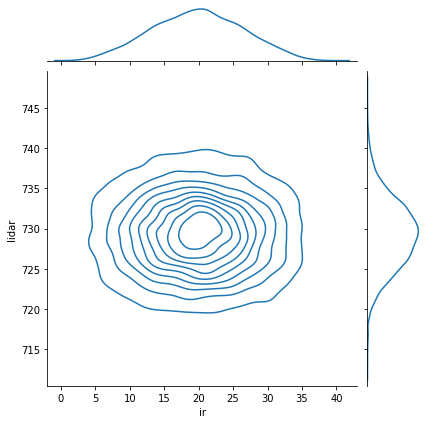

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    "../../sensor_data/sensor_data_700.txt",
    delimiter=" ",
    header=None,
    names=("date", "time", "ir", "lidar"),
)
d = data[(data["time"] < 160000) & (data["time"] >= 120000)]  # 12時から16時までのデータだけを抽出
d = d.loc[:, ["ir", "lidar"]]
sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()


$z_{{IR},{Li}}$から分散$\sigma^{2}_{x}$、$\sigma^{2}_{y}$と共分散$\sigma_{xy}$をそれぞれ求める。

共分散は以下の式(2.63)で求めている。
$$
\sigma_{xy}=\frac{1}{N-1}\sum_{i=0}^{N-1}(x_i-\mu_x)(y_i-\mu_y)
$$

In [4]:
print("光センサーの計測値の分散:", d.ir.var())
print("LiDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()
a = diff_ir * diff_lidar
print("共分散:", sum(a) / (len(d) - 1))

# 平均を算出
d.mean()


光センサーの計測値の分散: 42.117126367701594
LiDARの計測値の分散: 17.702026469211457
共分散: -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [5]:
# 次のように簡単に求まる
d.cov()


ir      lidar
ir     42.117126  -0.316778
lidar  -0.316778  17.702026

In [6]:
# 平均と共分散行列がわかったのでガウス分布を描画してみる

# 多次元ガウス分布のオブジェクトはsicpy.statsのmultivariate_normalを使って生成する
from scipy.stats import multivariate_normal

# d.mean().values.Tがμ, d.cov().valuesがΣに当たる。
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)


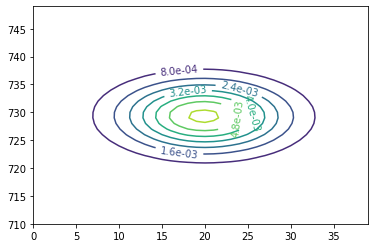

In [8]:
import numpy as np

x, y = np.mgrid[0:40, 710:750]  # 2次元平面に均等にX座標、Y座標を作る
pos = np.empty(x.shape+(2,))  # xは40x40の2次元リストで、これに3次元目を加えて40x40x2のリストを作成
pos[:,:,0]=x
pos[:,:,1]=y
cont=plt.contour(x,y,irlidar.pdf(pos))# x,y座標とそれに対応する密度を算出
cont.clabel(fmt="%1.1e") # 等高線に値を書き込むためのフォーマット指定

plt.show()


In [10]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [37, 37, 37, ..., 37, 37, 37],
       [38, 38, 38, ..., 38, 38, 38],
       [39, 39, 39, ..., 39, 39, 39]])

# 2.5.2 共分散の意味

式(2.63)を見ると

$(x_i-\mu_x)(y_i-\mu_y)$は、平均値に対してセンサー値それぞれが大きいか小さい場合正になり、どちらかが大きくてどちらかが小さい場合は負になる。

「光センサーのセンサー値が大きい（小さい）、LiDARのセンサー値が大きい（小さい）」という傾向があると$\sigma_{xy}$は正の大きな値になる。

一方が大きく、もう一方が小さい場合は負の大きな値になる。

そのどちらでもないとき、つまり両方の値に差がない場合はゼロに近くなる。

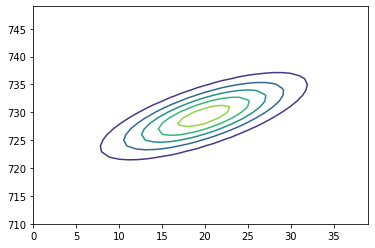

In [11]:
c=d.cov().values+np.array([[0,20],[20,0]])
tmp=multivariate_normal(mean=d.mean().values.T,cov=c)
cont=plt.contour(x,y,tmp.pdf(pos))
plt.show()

上記の図は「光センサーのセンサー値が大きい（小さい）、LiDARのセンサー値が大きい（小さい）」という傾向を描画した結果。